# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the excel file

In [29]:
titanic_df = pd.read_excel ('‪C:\Users\Bonisiwe\Desktop\My Files\MyCareer\Data Science\05_Python and R\01_Python\Excercises\01_TitanicCSV\titanic.xlsx','titanic', index_col = None, na_values = ['NA']) #this gives a unicodeescape error due to the backward slash "\"

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 12-13: truncated \UXXXXXXXX escape (<ipython-input-29-f8c081eaebb8>, line 1)

In [5]:
titanic_df = pd.read_excel("C:/Users/Bonisiwe/Desktop/My Files/MyCareer/Data Science/05_Python and R/01_Python/Excercises/01_TitanicCSV/titanic.xlsx",'titanic', index_col = None, na_values = ['NA']) #replacing "\" with "/" excecutes successfully

In [12]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploring the data

In [34]:
titanic_df.drop(['Ticket','Cabin', 'SibSp'],axis = 1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S


In [46]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
titanic_df.groupby(['Sex']).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [53]:
titanic_df.groupby(['Sex', 'Pclass']).mean()


PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

In [55]:
titanic_df[titanic_df['Age']<18].groupby(['Sex','Pclass']).mean()

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        525.375000  0.875000  14.125000  0.500000  0.875000   
       2        369.250000  1.000000   8.333333  0.583333  1.083333   
       3        374.942857  0.542857   8.428571  1.571429  1.057143   
male   1        526.500000  1.000000   8.230000  0.500000  2.000000   
       2        527.818182  0.818182   4.757273  0.727273  1.000000   
       3        437.953488  0.232558   9.963256  2.069767  1.000000   

                     Fare  
Sex    Pclass              
female 1       104.083337  
       2        26.241667  
       3        18.727977  
male   1       116.072900  
       2        25.659473  
       3        22.752523

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D61D96070>]],
      dtype=object)

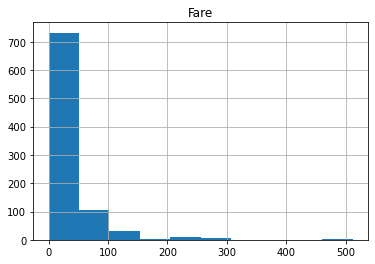

In [9]:
titanic_df.hist(column = 'Fare')

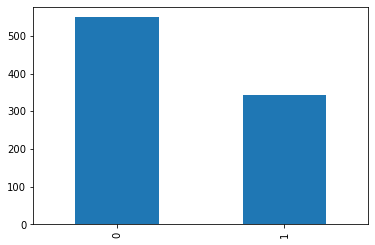

In [47]:
pd.value_counts(titanic_df['Survived']).plot.bar()